In [2]:
import pandas as pd
import numpy as ny
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as ml
import seaborn as sn

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
print(train_df['Sex'].unique())


['male' 'female']


In [15]:
print(train_df['Embarked'].unique())


['S' 'C' 'Q' nan]


In [16]:
def data_preprocessing(df, is_train=True):
    dropping_columns = ["Name","Ticket","Cabin","PassengerId"]
    df = df.drop(columns = dropping_columns,errors = 'ignore')
    if "Age" in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())
    if "Embarked" in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
        df = pd.get_dummies(df, columns=["Embarked"], drop_first=True,dtype=int)

    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    if 'Sex' in df.columns:
     df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

    if is_train:
        X = df.drop(["Survived"],axis = 1)
        y = df["Survived"]
        return X,y
    else:
        return df
        
    


In [17]:
x_train,y_train = data_preprocessing(train_df,True)

In [18]:
print(x_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    1  22.0      1      0   7.2500           0           1
1         1    0  38.0      1      0  71.2833           0           0
2         3    0  26.0      0      0   7.9250           0           1
3         1    0  35.0      1      0  53.1000           0           1
4         3    1  35.0      0      0   8.0500           0           1
..      ...  ...   ...    ...    ...      ...         ...         ...
886       2    1  27.0      0      0  13.0000           0           1
887       1    0  19.0      0      0  30.0000           0           1
888       3    0  28.0      1      2  23.4500           0           1
889       1    1  26.0      0      0  30.0000           0           0
890       3    1  32.0      0      0   7.7500           1           0

[891 rows x 8 columns]


In [19]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

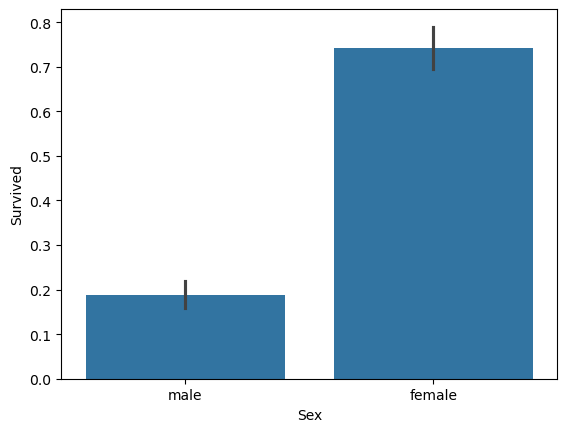

In [20]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

plt = sn.barplot(x="Sex",y="Survived",data=train_df)
train_df.groupby("Sex")["Survived"].mean() *100



## Survival Rate by Gender 
The above bar chart shows the survival rate by gender, there is a significant difference between them. The Average survival rate of females was aroud 74% whereas the men's survival rate stayed at only 18%. This mean gender is highly correlated with survival rate.

<Axes: xlabel='Age', ylabel='Count'>

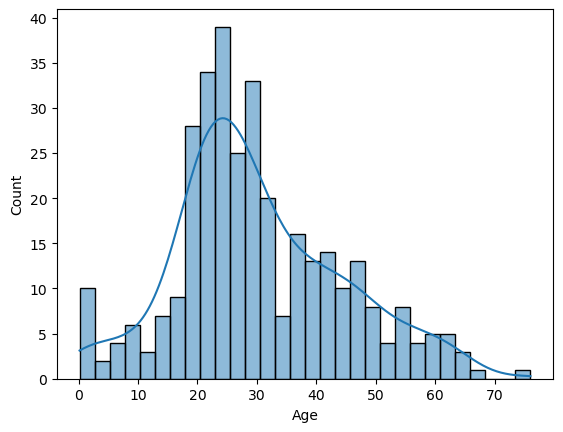

In [21]:
sn.histplot(test_df["Age"], bins=30, kde=True)




### The Surival rate of people with an age group of 18-35 had much higher as compared to others

In [22]:
X_train, X_test, Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)


In [23]:
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
new_y_predict = model.predict(X_test)

In [25]:
new_y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, new_y_predict))
print(confusion_matrix(Y_test, new_y_predict))
print(classification_report(Y_test, new_y_predict))

Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
procesed_data = data_preprocessing(test_df,False)
predicted_data = model.predict(procesed_data)

In [28]:
submission_file = pd.DataFrame({"PassengerId":test_df["PassengerId"],"Survived":predicted_data})


In [29]:
submission_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [30]:
submission_file.to_csv("submission.csv", index=False)